<a href="https://colab.research.google.com/github/ElsieOtube/AI/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
df_main = pd.read_csv('data_C.csv')
df = df_main.copy()
df.head()

Saving data_C.csv to data_C (1).csv


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,0,21.75,11.75,1.0,1,Energy,White,0.250,0.0,0.0,0.0,1.0,ByBirth,180.0,0,0
1,1,20.42,7.50,1.0,1,Financials,White,1.500,1.0,1.0,1.0,0.0,ByBirth,160.0,234,1
2,1,27.83,1.00,0.0,0,Real Estate,Black,3.000,0.0,0.0,0.0,0.0,ByBirth,176.0,537,0
3,0,27.42,14.50,1.0,1,Utilities,Black,3.085,1.0,1.0,1.0,0.0,ByBirth,120.0,11,1
4,1,34.17,NaN,1.0,1,InformationTechnology,White,1.540,1.0,1.0,1.0,1.0,ByBirth,520.0,50000,1


In [4]:
# no of unique values in each column
print(df.nunique())
print('---' * 20)

# dtypes of each column
print(df.dtypes)
print('---' * 20)

# no of missing values in each column
print(df.isnull().sum())
print('---' * 20)

print(df.shape)

Gender              2
Age               349
Debt              214
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     130
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64
------------------------------------------------------------
Gender              int64
Age               float64
Debt              float64
Married           float64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault      float64
Employed          float64
CreditScore       float64
DriversLicense    float64
Citizen            object
ZipCode           float64
Income              int64
Approved            int64
dtype: object
------------------------------------------------------------
Gender             0
Age                2
Debt               4
Married            2

In [5]:
# Encoding string / object  data types columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,0,21.75,11.75,1.0,1,4,4,0.250,0.0,0.0,0.0,1.0,0,180.0,0,0
1,1,20.42,7.50,1.0,1,5,4,1.500,1.0,1.0,1.0,0.0,0,160.0,234,1
2,1,27.83,1.00,0.0,0,10,1,3.000,0.0,0.0,0.0,0.0,0,176.0,537,0
3,0,27.42,14.50,1.0,1,13,1,3.085,1.0,1.0,1.0,0.0,0,120.0,11,1
4,1,34.17,NaN,1.0,1,8,4,1.540,1.0,1.0,1.0,1.0,0,520.0,50000,1


In [6]:
# Fix missing values, Fill missing values with mean column values

df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [7]:
X = df.drop('Approved', axis=1)
y = df['Approved']

In [8]:
import random

ts =  random.randint(1, 90) / 100
print(str(ts) +  " will now be used for testing")

0.1 will now be used for testing


In [10]:
ts = 0.2
rs = 42

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(552, 15)
(138, 15)
(552,)
(138,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# fit the models
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# make predictions from the models
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [13]:
# Create Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)           # cm object for knn classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)             # cm object for dt classifier

print(cm_knn)
print('----' * 3)
print(cm_dt)

[[59 18]
 [26 35]]
------------
[[66 11]
 [11 50]]


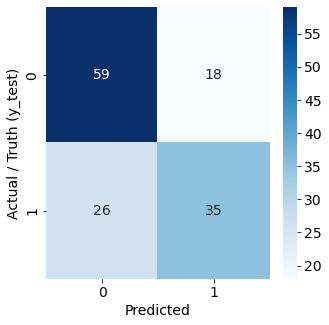

In [14]:
# plot confusion matrix (Matplotlib & Seaborn))
import matplotlib.pyplot as plt
import seaborn as sns

# plot confusion matrix for knn classifier set font size to 14
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 14})
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual / Truth (y_test)')
plt.show()

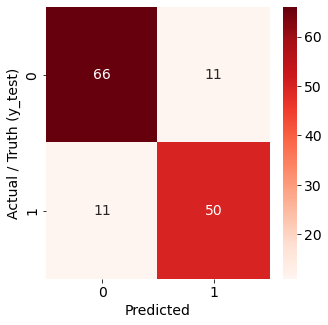

In [15]:
# plot confusion matrix for knn classifier set font size to 14
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 14})
sns.heatmap(cm_dt, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual / Truth (y_test)')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('knn accuracy score: ', accuracy_score(y_test, y_pred_knn))
print('knn precision score: ', precision_score(y_test, y_pred_knn))
print('knn recall score: ', recall_score(y_test, y_pred_knn))
print('knn f1 score: ', f1_score(y_test, y_pred_knn))

print('---' * 20)

print('dt accuracy score: ', accuracy_score(y_test, y_pred_dt))
print('dt precision score: ', precision_score(y_test, y_pred_dt))
print('dt recall score: ', recall_score(y_test, y_pred_dt))
print('dt f1 score: ', f1_score(y_test, y_pred_dt))

knn accuracy score:  0.6811594202898551
knn precision score:  0.660377358490566
knn recall score:  0.5737704918032787
knn f1 score:  0.6140350877192982
------------------------------------------------------------
dt accuracy score:  0.8405797101449275
dt precision score:  0.819672131147541
dt recall score:  0.819672131147541
dt f1 score:  0.819672131147541


In [17]:
# classification report (Basicallly a summary of all the above metrics)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

print('---' * 20)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        77
           1       0.66      0.57      0.61        61

    accuracy                           0.68       138
   macro avg       0.68      0.67      0.67       138
weighted avg       0.68      0.68      0.68       138

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.82      0.82      0.82        61

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



In [18]:
# we'll use the same data set as above thus no need to load it again. we can check the shape of the data split though
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(552, 15)
(138, 15)
(552,)
(138,)


In [19]:
# create a basic ANN model with 2 hidden layers and 1 output layer (2 outputs for probability of 0 and 1), 1 input layer (10 inputs)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# history here is a dictionary with keys: loss, accuracy, val_loss, val_accuracy

Epoch 1/10
18/18 [==============================] - 1s 18ms/step - loss: 1.7472 - accuracy: 0.6431 - val_loss: 1.1826 - val_accuracy: 0.7029
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.8705 - accuracy: 0.6304 - val_loss: 1.2064 - val_accuracy: 0.7246
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.9826 - accuracy: 0.6920 - val_loss: 0.9494 - val_accuracy: 0.6232
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7391 - accuracy: 0.6757 - val_loss: 0.7076 - val_accuracy: 0.7101
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6373 - accuracy: 0.6449 - val_loss: 0.6463 - val_accuracy: 0.7246
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.6612 - val_loss: 0.7133 - val_accuracy: 0.7174
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6612 - val_loss: 0.6644 - val_accuracy: 0.7319
Epoch 8/10
18/18 [=

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 2)                 32        
                                                                 
Total params: 752
Trainable params: 752
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# print the loss and accuracy
loss_acc = model.evaluate(X_test, y_test)
print("The loss is: ", loss_acc[0])
print("The accuracy is: ", loss_acc[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.6055 - accuracy: 0.7174
The loss is:  0.6055380702018738
The accuracy is:  0.717391312122345


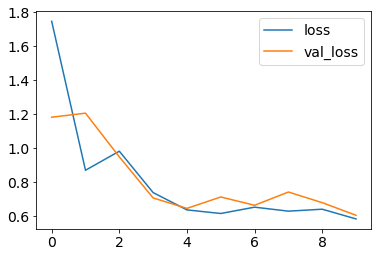

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

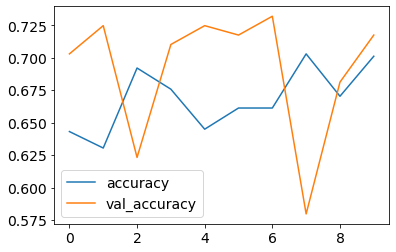

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


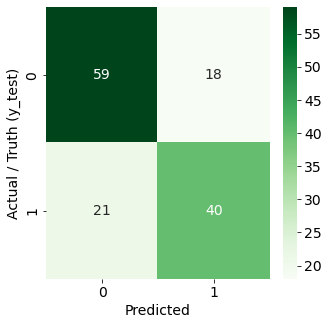

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Confusion Matrix
ann_pred = model.predict(X_test)
ann_pred = [np.argmax(i) for i in ann_pred]

cm_ann = confusion_matrix(y_test, ann_pred)


plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 14})
sns.heatmap(cm_ann, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual / Truth (y_test)')
plt.show()


In [26]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        77
           1       0.69      0.66      0.67        61

    accuracy                           0.72       138
   macro avg       0.71      0.71      0.71       138
weighted avg       0.72      0.72      0.72       138



In [27]:
# A sample prediction, we'll use a random row from the test set
sample = X_test.iloc[13]         # we sue the iloc function to get the row at an index. change the index to get a different row 
sample = sample.values.reshape(1, 15)     # reshape the sample to the shape of the input layer

print(model.predict(sample))

1/1 [==============================] - 0s 62ms/step
[[0.86067706 0.13932294]]
